In [ ]:
# 머신러닝 구조 (패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 데이터 분리
# -> 모델 선정 -> 학습 -> 평가 -> 피드백
# 재학습 OR 모델변경 OR 전처리 OR ... -> 배포
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터전처리 (모델에 학습할 데이터 준비)
# 기본 데이터를 학습 데이터와 테스트 데이터로 8:2 준비
# 학습 데이터 X_train, y_train
# 테스트 데이터 X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_label, 
    train_size=0.8,               # 80% 학습데이터 사용
    shuffle=False,                # 무작위 섞음 옵션
    stratify=iris_data.label,     # 라벨데이터로 비율을 맞춘다
    random_state=11               # np.random.seed(11)와 동일한 느낌
)                                 # 테스트 재현성 확보를 위해 

# 2. 모델 준비
model = LinearRegression()

# 3. 모델 학습
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)

# 5. 모델 평가
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"MSE: {mse}")
print(f"R2: {r2}")

# 시각화

NameError: name 'X_train' is not defined

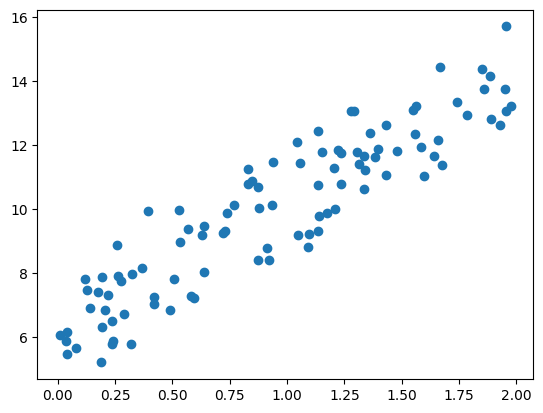

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0) # 난수 생성 시드
X = 2 * np.random.rand(100, 1) # 0~2 사이의 랜덤값 100개 데이터
y = 6 + 4 * X + np.random.randn(100, 1) # y = 6 + 4x + noise

# 데이터 시각화
plt.scatter(X, y)
plt.show()

6.222151077447117


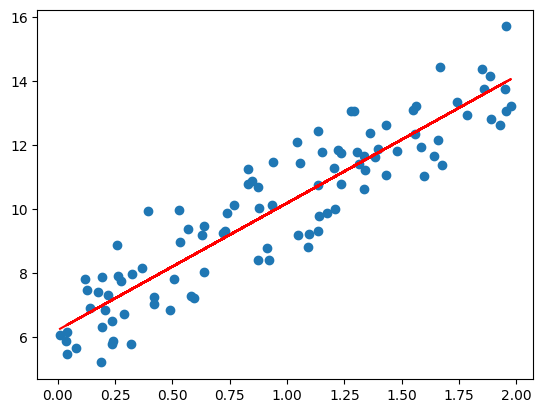

In [3]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)                                   # 데이터 개수
    cost = np.sum(np.square(y - y_pred)) / N     # 평균 제곱 오차
    return cost

# 가중치 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0                # 예측값 계산
    diff = y - y_pred                            # 오차 계산

    w0_factors = np.ones((N, 1))                 # w0 업데이트하는 상수 1 배열
    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))             # w1 업데이트
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))    # w0 업데이트

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))     # 초기 w0 값 설정
    w1 = np.zeros((1, 1))     # 초기 w1 값 설정

    # 가중치 업데이트 값 계산
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # w1 업데이트 적용
        w0 = w0 - w0_update # w0 업데이트 적용

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)   # 원본 데이터 시각화
plt.plot(X, y_pred, color='r')   # 경사하가법ㅇ로 학습된 직선을 그린다.
plt.show()

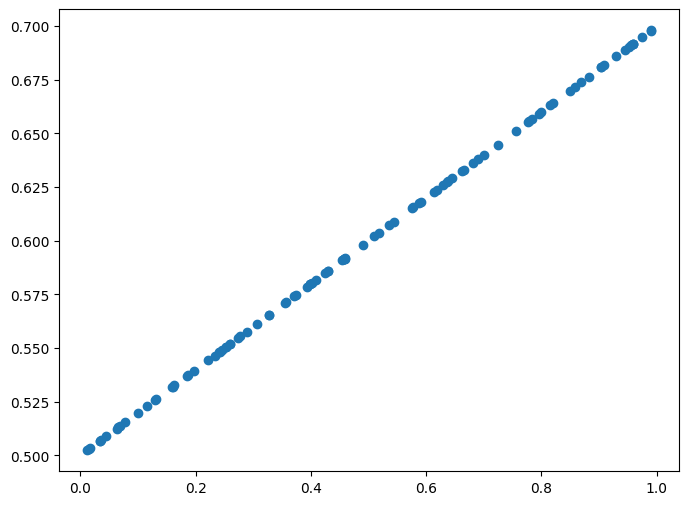

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100)     # 0~1 데이터 100개 생성
Y = 0.2 * X + 0.5           # 정답 Y (기울기 0.2, 절편 0.5인 직선)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, Y)           # 산점도 플롯
plt.show()

## 1. 데이터 만들고
## 2. 선형 모델 만들기
## 3. 

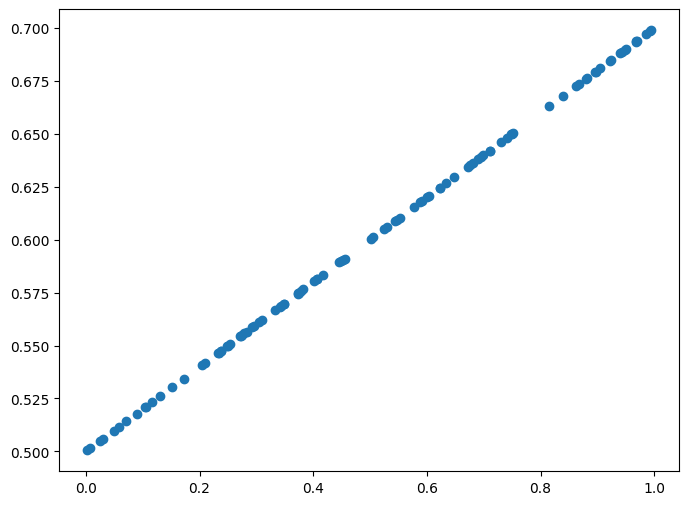

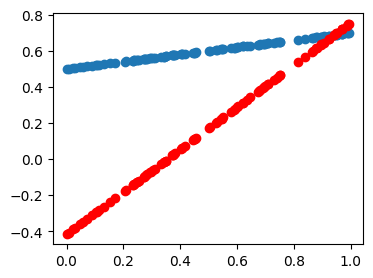

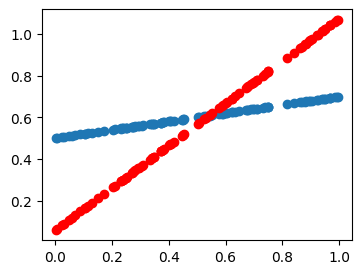

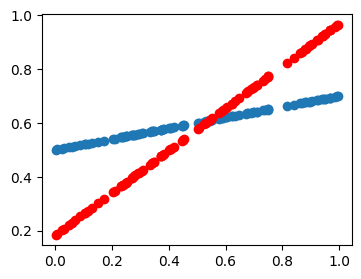

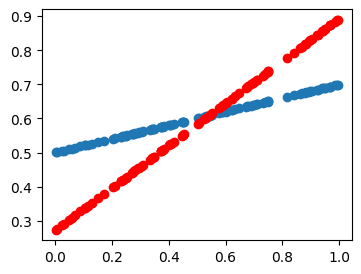

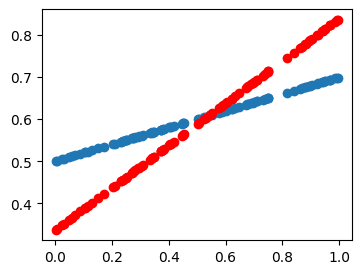

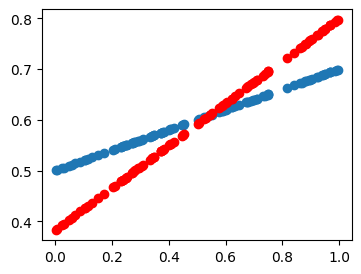

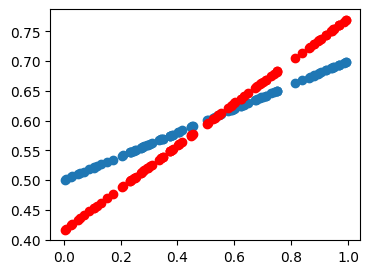

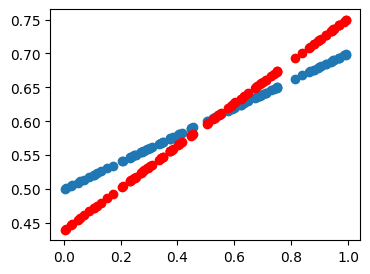

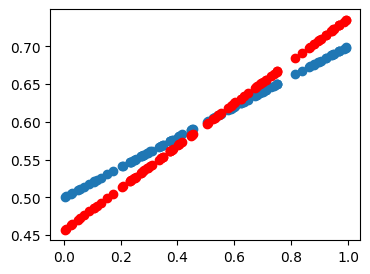

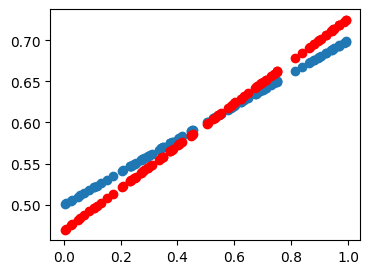

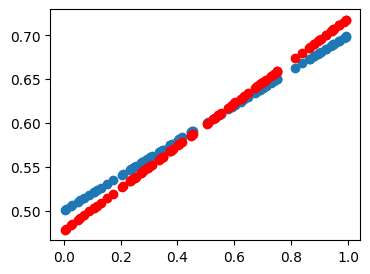

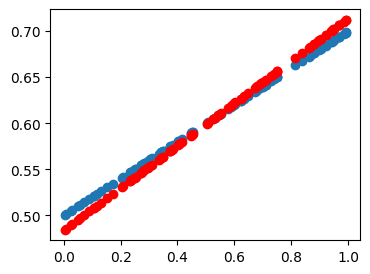

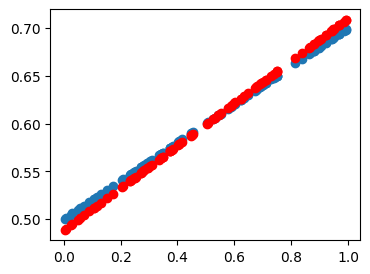

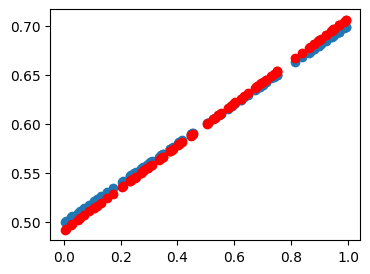

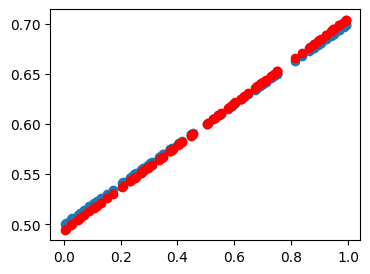

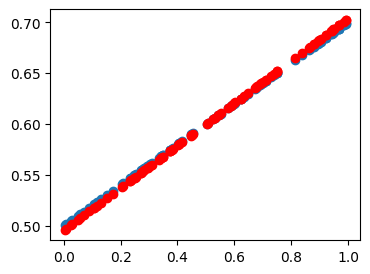

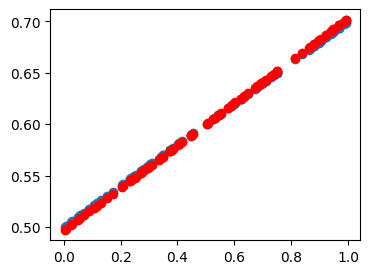

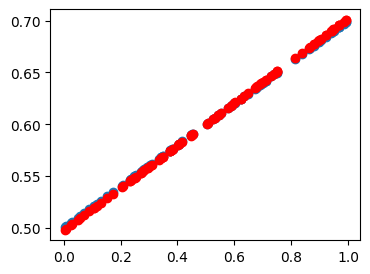

w : 0.20383778563434796
b : 0.4979214199714616


In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100) # 0~1 데이터 100개 생성 
y= 0.2 * x + 0.5

plt.figure(figsize=(8,6))
plt.scatter(x,y) #산점도 플롯 
plt.show()
#가중치와 편향 초기화
w = np.random.uniform(-1,1) # 가중치 w를 -1~1 사이 랜덤 값으로
b = np.random.uniform(-1,1) # 편향  b를 -1~1 사이 랜덤 값으로

#예측 결과 시각화 함수
def plot_pred(pred,y):
    plt.figure(figsize=(4,3))
    plt.scatter(x,y)
    plt.scatter(x, pred,color='red')
    plt.show()

#경사 하강법을 통한 학습
lr = 0.5

#경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred = w * x + b          # 현재 w, b로 예측값 계산

    error = np.abs(y_pred - y).mean() #예측값과 실제값의 평균 절대오차 (MAE)

    w_grad = lr * ((y_pred - y) * x).mean() # w에 대한 기울기 계산 후 학습률 곱하기
    b_grad = lr * (y_pred - y).mean() # w에 대한 기울기 계산 후 학습률 곱하기

    w = w - w_grad # 가중치 w를 경사하강법으로 업데이트
    b = b - b_grad # 편향 b를 경사하강법으로 업데이트

#오차가 충분히 작아지면 반복 중단 (조기 종료) = > 스케쥴러
    if error < 0.001:
        break
    if epoch % 10 == 0:         # 10번 예폭마다
        y_pred = w * x + b      # 최신 w,b로 다시 예측값 계산
        plot_pred(y_pred,y)     # 에측결과를 시각화

#최종 학습된 가중치와 편향 확인
print('w :', w)
print('b :', b)

In [17]:
# MSE: 제곱오차평균 -> 큰 오차에 민감. 낮을수록 성능이 좋다.
# RMSE: MSE에 제곱근 -> 큰 오차에 덜 민감. 낮을수록 성능이 좋다.
# MAE: 절대값의 평균 -> 직관적. 이상치에 덜 민감. 낮을수록 성능이 좋다.
# R2: 얼마나 이 모델이 설명력이 있는지 -> 1에 가까울수록 모델의 성능이 좋다.

### 03-03-07. 선형 회귀 예제

- 사이킷런의 `LinearRegression` 클래스를 사용하여 선형 회귀 모델을 학습하고, 결과를 시각화한다.

기울기(coefficient) : 2.0
절편 (intercept): -0.20000000000000018
MSE(평균제곱오차): 0.15999999999999992
R2 Score: 0.9803921568627451


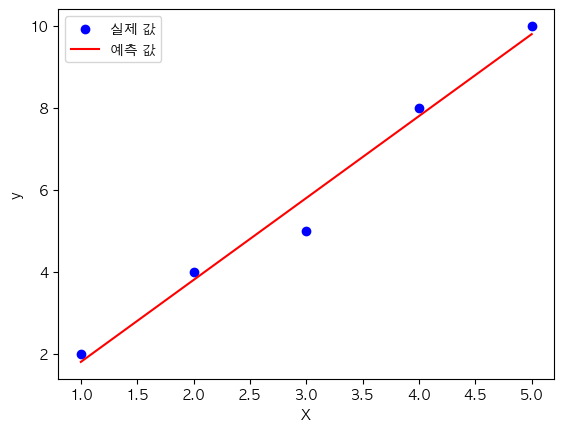

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.metrics import mean_squared_error, r2_score # 평가지표 평균제곱오차

# 폰트 및 마이너스 깨짐 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 생성
X = np.array(
    [
        [1], [2], [3], [4], [5] # 입력값 (2차원 형태)
    ]
)
y = np.array([2, 4, 5, 8, 10])

# print(X.shape)
# print(y.shape)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)
#y_pred 예측값 출력

# 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"기울기(coefficient) : {model.coef_[0]}") # 학습된 기울기 W 출력
print(f"절편 (intercept): {model.intercept_}")  # 학습된 절편 b 출력
print(f"MSE(평균제곱오차): {mse}")                           # 평균제곱오차
print(f"R2 Score: {r2}")                       # R2 Score

# 시각화
plt.scatter(X, y, color='blue', label="실제 값")
plt.plot(X, y_pred, color='red', label="예측 값")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()     # 범례 표시
plt.show()

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.metrics import mean_squared_error    # MSE(평균제곱오차) 평가지표

# 데이터 생성
X = np.array([
    [1, 2100],
    [2, 2500],
    [3, 1800],
    [4, 2200],
    [5, 1700]
])
y = np.array([500, 550, 480, 530, 475])

# 모델 생성
model = LinearRegression()
model.fit(X, y)

# 예측값 생성
y_pred = model.predict(X)

# 평가지표 계산
mse = mean_squared_error(y, y_pred)
# print(y_pred) # 예측값 출력

print(f"기울기(coefficient) : {model.coef_[0]}") # 학습된 기울기 W 출력
print(f"절편 (intercept): {model.intercept_}")  # 학습된 절편 b 출력
print(f"MSE(평균제곱오차): {mse}")                           # 평균제곱오차


기울기(coefficient) : 5.3608247422680355
절편 (intercept): 259.4329896907218
MSE(평균제곱오차): 3.0927835051547214


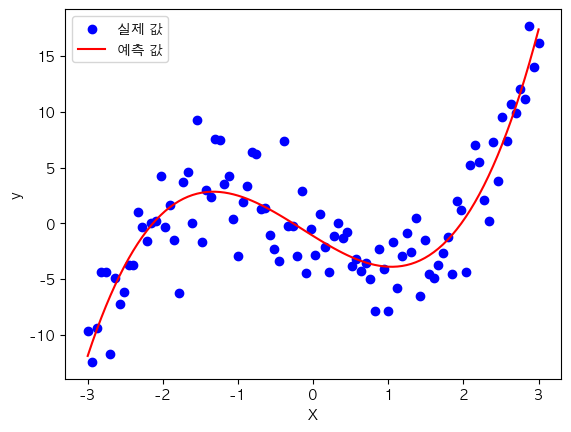

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1) 
# -3~3 사이의 값을 100개 생생 후 2차원배열로 변환 (100, 1)
# X = np.linspace(-3, 3, 100) # 1차원임
y = X**3 -4*X + np.random.randn(100, 1) * 3 # 비선형함수 + 노이즈로 y 생성

# 다항특성 변환 (차수 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False) # degree=3 => X, X^2, X^3 생성
X_poly = poly_features.fit_transform(X) # X를 다항 특성으로 변환

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X, y, color='blue', label="실제 값")
plt.plot(X, y_pred, color='red', label="예측 값")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()     # 범례 표시
plt.show()

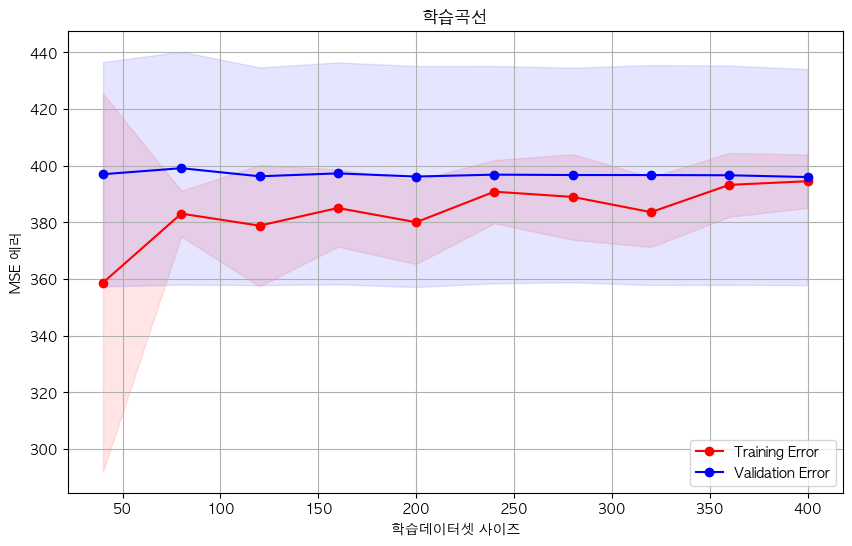

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve # 학습곡선 계산
from sklearn.linear_model import LinearRegression #선형회귀 모델
from sklearn.datasets import make_regression # 회귀용 예제 데이터셋

# 데이터 생성 ( 샘플 500개, 특성 1개, 노이즈 20, 랜덤시드 42)
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(),                     # 선형회귀모델
    X, y,                                   # 입력 X, 타겟 y
    cv=5,                                   # 5겹 교차 검증
    scoring="neg_mean_squared_error",       # 평균제곱오차(MSE) 사용
    train_sizes=np.linspace(0.1, 1.0, 10)   # 0.1 ~ 1.0 까지 10단계로 점차적으로 증가 
)

# 평균과 표쥰편차 계산
train_mean = -train_scores.mean(axis=1)   # train scores 평균(MSE). 음수는 양수로 변경
train_std = train_scores.std(axis=1)      # train scores 표준편차
val_mean = -val_scores.mean(axis=1)       # validation scores 평균(MSE). 음수는 양수로 변경
val_std = val_scores.std(axis=1)          # validation scores 표준편차

# 학습곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Error', color='red')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Error', color='blue')

# 표준편차 영역 (불확실성 영역) 표시
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('학습데이터셋 사이즈')
plt.ylabel('MSE 에러')
plt.title('학습곡선')
plt.legend()
plt.grid(True)
plt.show()



In [1]:
import math

p = [1, 2]
q = [4, 6]

distance = math.dist(p, q)
print(distance)   # 출력: 5.0

5.0


In [6]:
# 코싸인 유사도

import numpy as np

p = np.array([1, 2])
q = np.array([2, 3])

cos_sim = np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))
print(round(cos_sim, 3))   # 출력: 0.992

0.992


In [8]:
# 마할라노비스 거리
import numpy as np
from scipy.spatial.distance import mahalanobis

# 샘플 데이터(공분산 계산용)
data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])

p = np.array([1, 2])
q = np.array([3, 4])

cov = np.cov(data.T)               # 공분산 행렬
inv_cov = np.linalg.inv(cov)       # 공분산 역행렬

dist = mahalanobis(p, q, inv_cov)
print(round(dist, 3))  # 예: 2

2.0


In [11]:
import numpy as np

theta = np.array([0.5, 1.0])   # 가중치
x = np.array([1, 2])           # 입력 데이터

z = theta @ x                  # 선형 조합 (θ^T x)
sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

print(round(sigmoid, 3))       # 예: 0.924

0.924


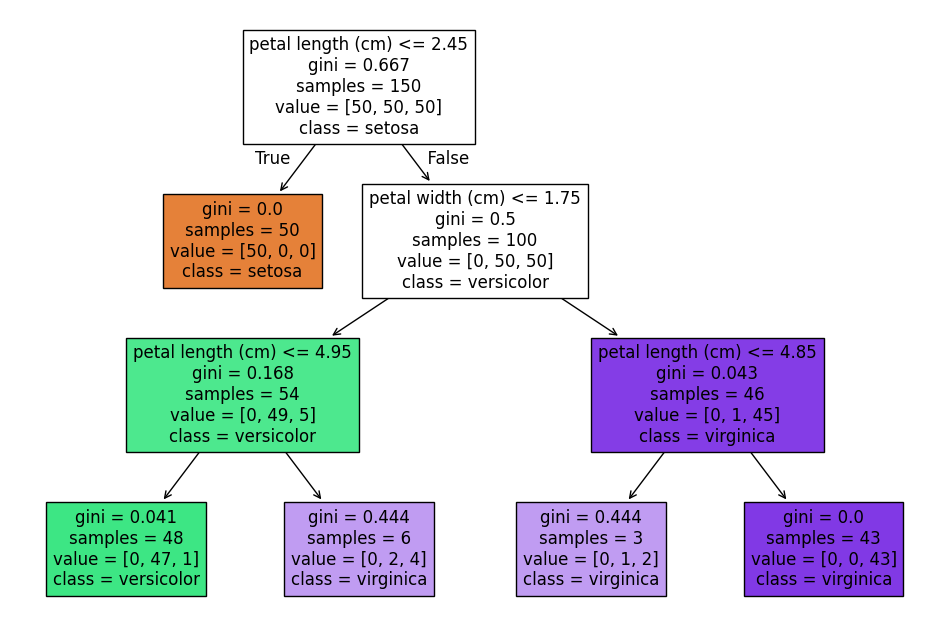

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 로드 및 모델 학습
iris = load_iris()
X, y = iris.data, iris.target
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [3]:
from collections import Counter

# 어떤 리프 노드에 도달한 샘플들의 실제 클래스
leaf_samples = ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A']

counts = Counter(leaf_samples)
total = len(leaf_samples)

counts.items()

dict_items([('A', 8), ('B', 2)])

In [4]:
probs = {cls: cnt / total for cls, cnt in counts.items()}
print(probs)   # 예: {'A': 0.8, 'B': 0.2}

{'A': 0.8, 'B': 0.2}


In [5]:
from collections import Counter

# 한 노드에 있는 샘플들의 클래스
node = ['A', 'A', 'B', 'A', 'B', 'A']

counts = Counter(node)
total = len(node)

gini = 1 - sum((cnt/total)**2 for cnt in counts.values())
print(round(gini, 3))   # 예: 0.444

0.444


In [7]:
import math
from collections import Counter

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((c/total) * math.log2(c/total) for c in counts.values())

# 전체 데이터의 클래스
D = ['A', 'A', 'B', 'A', 'B', 'A']   # 엔트로피 계산
H_D = entropy(D)

print("분할 전 엔트로피", H_D)
# 속성 A로 분할한 경우
Dv1 = ['A', 'A', 'A']   # 예: feature A = 0 그룹
Dv2 = ['B', 'A', 'B']   # 예: feature A = 1 그룹

H_split = (len(Dv1)/len(D)) * entropy(Dv1) + \
          (len(Dv2)/len(D)) * entropy(Dv2)

IG = H_D - H_split
print("분할 전 엔트로피", H_split)
print("정보 이득:", round(IG, 3))

분할 전 엔트로피 0.9182958340544896
분할 전 엔트로피 0.4591479170272448
정보 이득: 0.459


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 규제 없음 (과적합 가능)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print("규제 없음 정확도:", model1.score(X_test, y_test))

# 최대 깊이 제한
model2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model2.fit(X_train, y_train)
print("max_depth=2 정확도:", model2.score(X_test, y_test))

규제 없음 정확도: 1.0
max_depth=2 정확도: 0.9777777777777777


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# 회귀용 california housing 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 규제 없는 회귀 트리
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 첫 번째 테스트 샘플 예측
pred = model.predict([X_test[0]])
print("예측값:", np.round(pred[0], 3))
print("실제값:", np.round(y_test[0], 3))

예측값: 0.425
실제값: 0.477
